<a href="https://colab.research.google.com/github/PriyathamVarma/machine-learning-leeds/blob/main/Leeds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Visualization** - A Machine Learning approach for heart attack prediction

# This dataset contains information like age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal and the target that we acheive at the end as a result.

In [1]:
# Imputation - if null values exit then we have to perform imputation to fill the missing values
# categorical encoding - if any categorical attributes are present, then we have to employ this.
# one hot encoder - to encode values
# feature scaling - normalisation or standardisation
# Correlations - 0.2 to 0.8

In [2]:
# IMPORTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import sklearn as skl
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import f1_score

In [3]:
path = "https://raw.githubusercontent.com/SwaroopVatsavaye/Classification-models/main/Dataset.csv"

In [4]:
df = pd.read_csv(path)

In [5]:
df.style.background_gradient(cmap="Blues")

# y = f(x,x1,x2,x3,.......)
# Here, "x" is an independent variable and "y" is a dependent variable on x,x1,x2,x3,.....

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [49]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

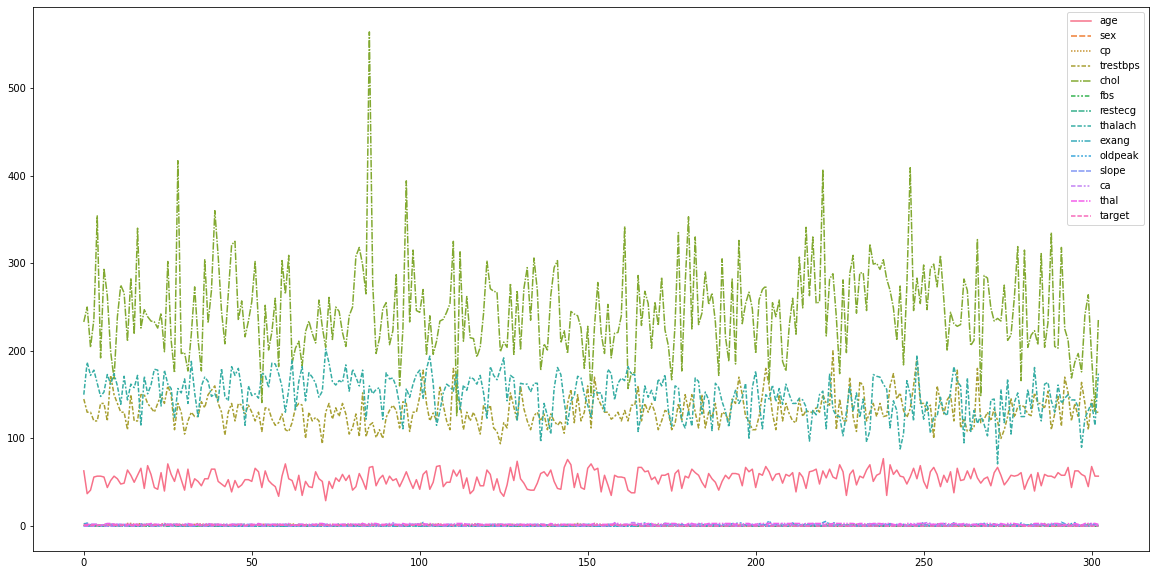

In [8]:
plt.figure(figsize=(20,10))
sns.lineplot(data = df)
plt.show()


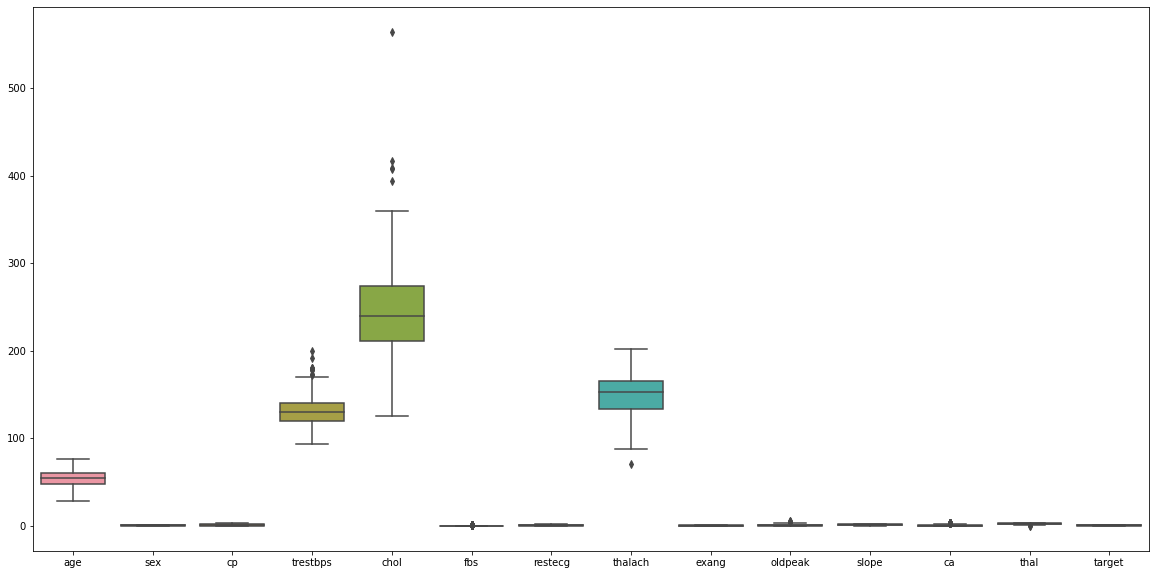

In [9]:
plt.figure(figsize=(20,10))
sns.boxplot(data = df)
plt.show()

<Figure size 1440x720 with 0 Axes>

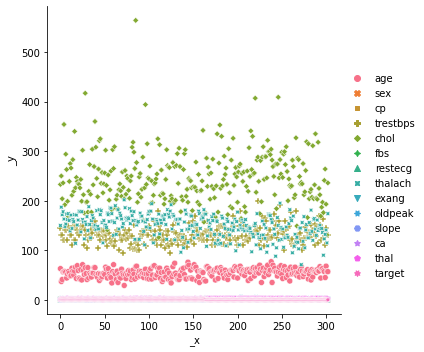

In [10]:
plt.figure(figsize=(20,10))
sns.relplot(data = df)
plt.show()

In [11]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [12]:
X = df.iloc[:,0:13]
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [13]:
y = df.iloc[:,13:]
y

,target
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


In [14]:
# one hot encoding
normalized_array = skl.preprocessing.normalize(X, norm='l2',  axis=1, copy=True, return_norm=False)

In [15]:
type(normalized_array)

numpy.ndarray

In [16]:
new_df = pd.DataFrame(data = normalized_array)

In [17]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [18]:
new_df.columns =  df.iloc[:,0:13].columns

# After normalization, all the values are now in the range of 0 to 1 and we can clearly observe that the values are converted from "int" type to "float" type

In [19]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
dtypes: float64(13)
memory usage: 30.9 KB


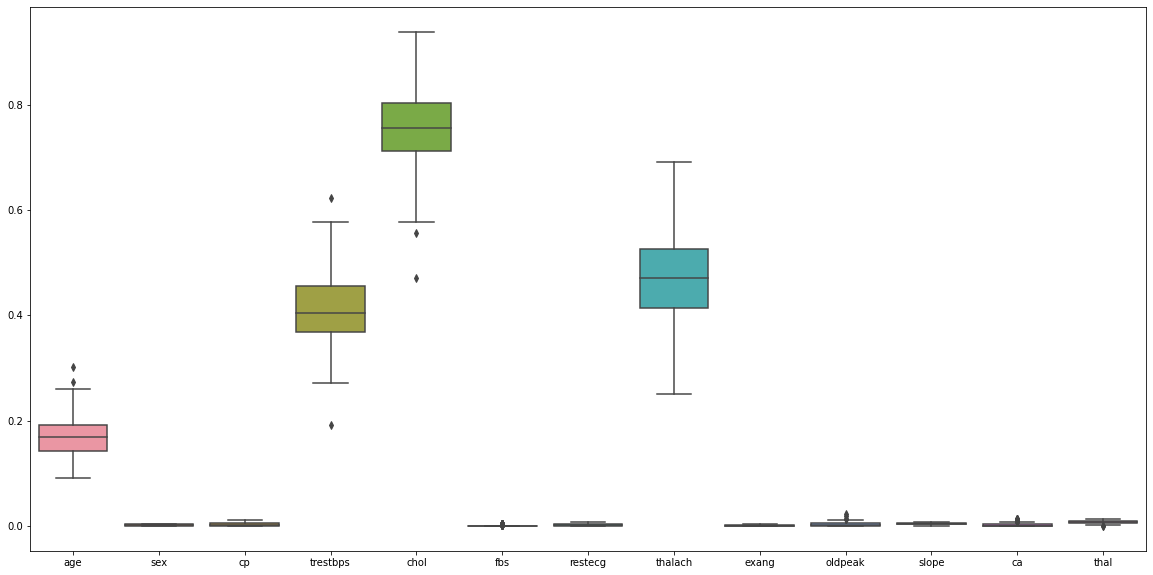

In [20]:
plt.figure(figsize=(20,10))
sns.boxplot(data = new_df)
plt.show()

<Figure size 1440x216 with 0 Axes>

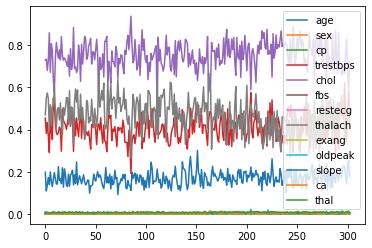

In [21]:
plt.figure(figsize=(20,3))
new_df.plot(kind = "line")
plt.show()

<Figure size 1440x720 with 0 Axes>

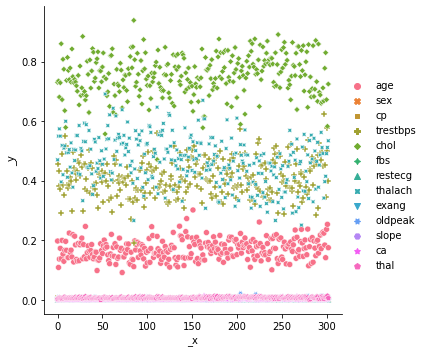

In [22]:
plt.figure(figsize=(20,10))
sns.relplot(data = new_df)
plt.show()

In [23]:
# correlations
new_df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
age,1.000000,0.117060,-0.033604,0.470611,-0.266196,0.103073,0.068993,-0.106827,0.149935,0.267376,-0.062286,0.236695,0.231287
sex,0.117060,1.000000,-0.028234,0.193136,-0.213438,0.063915,-0.016263,0.149478,0.189976,0.148685,0.065875,0.143326,0.319236
cp,-0.033604,-0.028234,1.000000,0.081856,-0.264072,0.086444,0.072313,0.311405,-0.374681,-0.140459,0.137701,-0.145942,-0.126634
trestbps,0.470611,0.193136,0.081856,1.000000,-0.692804,0.140899,0.087654,0.177103,0.114935,0.256473,-0.013768,0.111281,0.227094
chol,-0.266196,-0.213438,-0.264072,-0.692804,1.000000,-0.070628,-0.222237,-0.807817,0.126372,-0.005133,-0.288362,0.025156,-0.213520
fbs,0.103073,0.063915,0.086444,0.140899,-0.070628,1.000000,-0.060510,-0.023519,0.003247,-0.009479,-0.051083,0.120669,-0.048560
restecg,0.068993,-0.016263,0.072313,0.087654,-0.222237,-0.060510,1.000000,0.207502,-0.071320,-0.051016,0.150414,-0.054606,0.108973
thalach,-0.106827,0.149478,0.311405,0.177103,-0.807817,-0.023519,0.207502,1.000000,-0.269303,-0.224560,0.415112,-0.163682,0.094595
exang,0.149935,0.189976,-0.374681,0.114935,0.126372,0.003247,-0.071320,-0.269303,1.000000,0.313920,-0.239021,0.098970,0.225783
oldpeak,0.267376,0.148685,-0.140459,0.256473,-0.005133,-0.009479,-0.051016,-0.224560,0.313920,1.000000,-0.527652,0.208493,0.239995


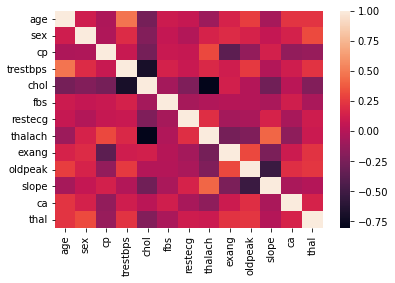

In [24]:
sns.heatmap(new_df.corr())


# **Model development**
1. Splitting the data into train and test.
2. Upsampling minor classes of training data if any
3. Classification

  3.1 Linear svc
  3.2 NaiveBayes
  3.3 stochastic gradient deescent
  3.4 knn classifier
  3.5 decision tree
  3.6 random forest
  3.7 accuracies calculation

4. Cross-validation

  4.1 Linear svc
  4.2 NaiveBayes
  4.3 stochastic gradient deescent
  4.4 knn classifier
  4.5 decision tree
  4.6 random forest
  4.7 accuracies calculation

5. Observations and confusion matrix
6. Performance metrics for classification
7. Clustering  

# Target class - 0 or 1 (bivariate analysis)
# For suppose - 0,1,2,3,4,5,6,7,8,9 (multi-class)

# while developing the model and splitting it, we have two options - holdout and cross-validation.

In [25]:
#Splitting the data

x = new_df
y

,target
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


In [26]:
# Splitting into training and testing
#splitting into train and test
from sklearn.model_selection import train_test_split

# Without stratification divide into first partition and test set.
train_X,test_X, train_y, test_y= train_test_split (x,y, test_size=0.2,random_state=10)

print(train_X.describe())
print(test_X.describe())

              age         sex          cp  ...       slope          ca        thal
count  242.000000  242.000000  242.000000  ...  242.000000  242.000000  242.000000
mean     0.169065    0.002070    0.003109  ...    0.004351    0.002149    0.007062
std      0.033324    0.001539    0.003292  ...    0.002022    0.003149    0.002118
min      0.091628    0.000000    0.000000  ...    0.000000    0.000000    0.000000
25%      0.142419    0.000000    0.000000  ...    0.003059    0.000000    0.005860
50%      0.167546    0.002916    0.002891  ...    0.003737    0.000000    0.006674
75%      0.189042    0.003262    0.006150  ...    0.006172    0.003390    0.008643
max      0.301597    0.004286    0.010708  ...    0.008573    0.014048    0.012049

[8 rows x 13 columns]
             age        sex         cp  ...      slope         ca       thal
count  61.000000  61.000000  61.000000  ...  61.000000  61.000000  61.000000
mean    0.173365   0.002596   0.002701  ...   0.004451   0.002736   0.007940

In [27]:
#classifier 1
#LinearSVC

from sklearn.svm import LinearSVC

svc = LinearSVC()
svc.fit(train_X, train_y);

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [28]:
precision_recall_fscore_support(test_y, svc.predict(test_X), average='macro')

(0.6797619047619048, 0.6659340659340659, 0.6369047619047619, None)

In [29]:
#classifier 2
#NaiveBayes

from sklearn.naive_bayes import GaussianNB

naive_bayes = GaussianNB()
naive_bayes.fit(train_X, train_y);

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [30]:
precision_recall_fscore_support(test_y, naive_bayes.predict(test_X), average='macro')

(0.7821350762527233, 0.7846153846153847, 0.783155592015313, None)

In [31]:
#classifier 3
#stochastic gradient descent
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(train_X, train_y);

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [32]:
precision_recall_fscore_support(test_y, sgd.predict(test_X), average='macro')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.21311475409836064, 0.5, 0.29885057471264365, None)

In [33]:
#classifier 4
#knn classifier
from sklearn.neighbors import KNeighborsClassifier

clf_nn = KNeighborsClassifier(n_neighbors=5)
clf_knn=clf_nn
clf_knn.fit(train_X,train_y)
y_hat = clf_knn.predict(test_X)
y_hat


from sklearn.metrics import accuracy_score

#we can use the built in accuracy metrics in sklearn.
accuracy = accuracy_score(test_y, y_hat)
print('calculated accuracy:',accuracy)


calculated accuracy: 0.6229508196721312


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [34]:
precision_recall_fscore_support(test_y, y_hat, average='macro')

(0.6298701298701299, 0.6318681318681318, 0.6225450632230294, None)

In [35]:
#classifier 5
#Random forest classifier
from sklearn.ensemble import RandomForestClassifier

random_variable = RandomForestClassifier(max_depth=100)

random_variable.fit(train_X,train_y)

new_random_variable = random_variable.predict(test_X)

new_random_variable


from sklearn.metrics import accuracy_score

#we can use the built in accuracy metrics in sklearn.
accuracy2 = accuracy_score(test_y, new_random_variable)
print('Sklearn calculated accuracy:',accuracy2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Sklearn calculated accuracy: 0.7868852459016393


In [36]:
precision_recall_fscore_support(test_y, new_random_variable, average='macro')

(0.7821350762527233, 0.7846153846153847, 0.783155592015313, None)

In [37]:
#classifier 6
#decision tree classifier
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(max_depth=100)

decision_tree.fit(train_X,train_y)

new_decision_tree = decision_tree.predict(test_X)

decision_tree


from sklearn.metrics import accuracy_score

#we can use the built in accuracy metrics in sklearn.
accuracy3 = accuracy_score(test_y, new_decision_tree)
print('Sklearn calculated accuracy:',accuracy3)

Sklearn calculated accuracy: 0.7868852459016393


In [38]:
precision_recall_fscore_support(test_y, new_decision_tree, average='macro')


(0.7821350762527233, 0.7846153846153847, 0.783155592015313, None)

In [39]:
#scores
#comparison of classifiers

from sklearn.metrics import accuracy_score

classifiers = [svc, sgd,  naive_bayes ,clf_nn,decision_tree, random_variable]

# for each classifier get the accuracy score
scores = [accuracy_score(clf.predict(test_X), test_y) for clf in classifiers]
    
index = np.argmax(scores)

print(scores,2)

print(classifiers[index])
print("highest score",round(scores[index],2))
accuracy_percentage = (round(scores[index],2))*100
print("ACCURACY PERCENTAGE FOR CLASSIFIER ",accuracy_percentage,"%") 

[0.639344262295082, 0.4262295081967213, 0.7868852459016393, 0.6229508196721312, 0.7868852459016393, 0.7868852459016393] 2
GaussianNB()
highest score 0.79
ACCURACY PERCENTAGE FOR CLASSIFIER  79.0 %


# Evaluation metrics and confusion matrix

In [40]:
#Confusion matrix
#confusion matrix
#lsvc
lsvc = LinearSVC()
lsvc=lsvc.fit(train_X, train_y)
lsvc.predict(test_X)
#gnb
gnb = GaussianNB()
gnb=gnb.fit(train_X, train_y)
gnb.predict(test_X)
#sgdc
sgdc = SGDClassifier()
sgdc=sgdc.fit(train_X, train_y)
sgdc.predict(test_X)
# knn
knn = KNeighborsClassifier(n_neighbors=10)
knn = knn.fit(train_X, train_y)
knn.predict(test_X)
#dt
dt = DecisionTreeClassifier(max_depth=100)
dt = dt.fit(train_X, train_y)
dt.predict(test_X)
# rfc
rfc = RandomForestClassifier(max_depth=100)
rfc = rfc.fit(train_X, train_y)
rfc.predict(test_X)



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

array([0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1])

In [41]:
from sklearn.metrics import plot_confusion_matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 14400x7200 with 0 Axes>

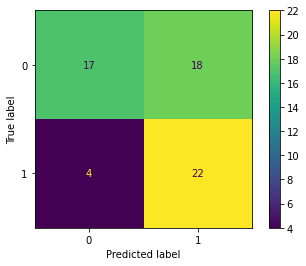

In [42]:
#plotting
plt.figure(figsize=(200,100))
plot_confusion_matrix(lsvc,test_X,test_y)
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 14400x7200 with 0 Axes>

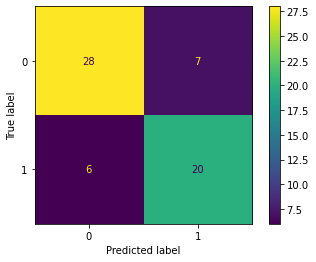

In [43]:
#plotting
plt.figure(figsize=(200,100))
plot_confusion_matrix(gnb,test_X,test_y)
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 14400x7200 with 0 Axes>

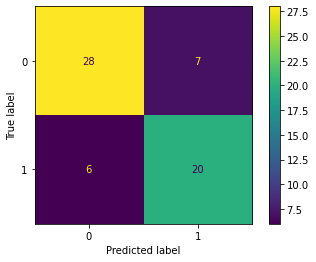

In [44]:
#plotting
plt.figure(figsize=(200,100))
plot_confusion_matrix(gnb,test_X,test_y)
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 14400x7200 with 0 Axes>

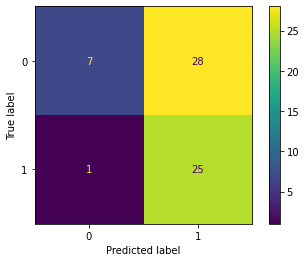

In [45]:
#plotting
plt.figure(figsize=(200,100))
plot_confusion_matrix(sgdc,test_X,test_y)
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 14400x7200 with 0 Axes>

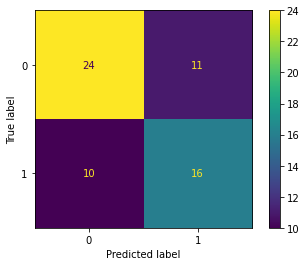

In [46]:
#plotting
plt.figure(figsize=(200,100))
plot_confusion_matrix(knn,test_X,test_y)
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 14400x7200 with 0 Axes>

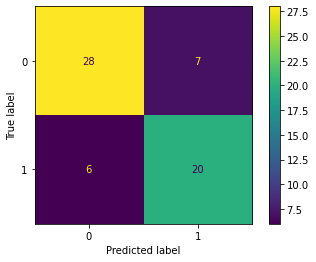

In [47]:
#plotting
plt.figure(figsize=(200,100))
plot_confusion_matrix(dt,test_X,test_y)
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 14400x7200 with 0 Axes>

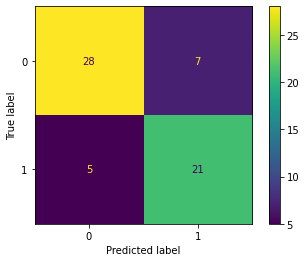

In [48]:
#plotting
plt.figure(figsize=(200,100))
plot_confusion_matrix(rfc,test_X,test_y)
plt.show()